# 0. EDA Process

## 절차
1. 1차원 데이터 분석
    1) 변수 종류 파악 ( 수치 vs 범주 vs 시간)
    2) 변수 종류별 분석 지표 마련 (수치| 범주 | 시간)
    3) 시각화 ( 도수분포표 | 히스토그램 | 상자그림 )
    
2. 2차원 데이터 분석
    1) 공분산 / 상관 계수
    2) 다중공선성 확인
    3) 시각화 ( 선점도 | 회귀직선 | 히트맵 )

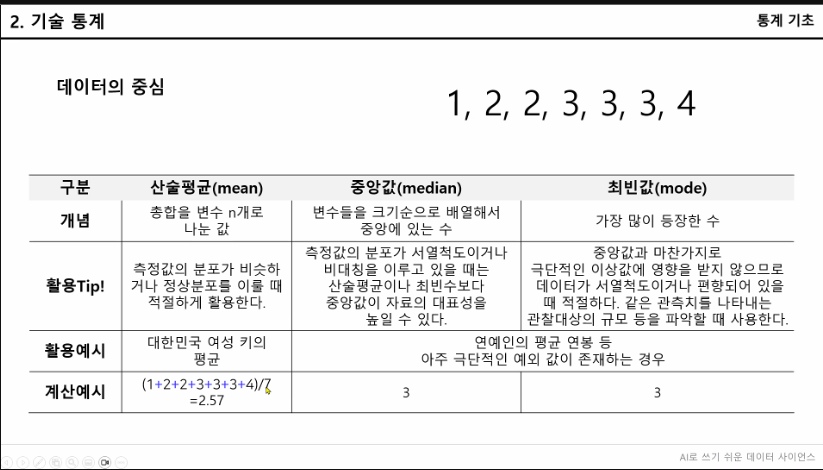

## 중심 경향값(대표값)
- 평균(mean)
- 중앙값(median)
- 최빈값(mode)

## 산포도
- 표준편차(stddev)
- 분산(variance)
- 범위(range)
- 사분위(quartitle)

## 분포도
- 왜도(skewness)
- 첨도(kurtosis)


# 항공사 지연요인 데이터 탐색적 분석
https://www.kaggle.com/datasets/pitterman/airline-stats  

kaggle : 데이터 분석 관련된 대회 및 커뮤니티

## 데이터셋 분석
- carrier_delay : 항공사 요인
- atc_delay : ATC 항공 교통 관제 요인
- weather_delay : 날씨로 인한 지연 요인
- airline : 항공사


In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv('./data/airline_stats.csv')
df.head(5)

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


### 1. 변수 탐색  
- 수치형 변수  
pct_carrier_delay / pct_atc_delay / pct_weather_delay  

- 범주형 변수  
airline

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [18]:
# 범주형 변수 카테고리 확인
df['airline'].unique(), df['airline'].unique().shape

#df['airline'].value_counts()
#6개의 항공사 이름으로 구성되어있음

(array(['American', 'Alaska', 'Jet Blue', 'Delta', 'United', 'Southwest'],
       dtype=object),
 (6,))

### 2. 수치형 변수의 통계량 확인

In [19]:
df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [30]:
df.columns.shape[0]

4

In [44]:
for i in df.columns[:-1]:
    print(f'{'*'*80}')
    print(f'요인 : {i}')
    print(df.groupby(by = 'airline').describe()[i])
    print(f'{'*'*80}')
    
#df.groupby(by = 'airline').describe()

********************************************************************************
요인 : pct_carrier_delay
            count      mean       std  min       25%       50%        75%  \
airline                                                                     
Alaska     3851.0  3.521889  2.483224  0.0  1.935484  3.225806   4.685599   
American   5723.0  9.042180  4.139067  0.0  6.338538  8.428571  10.988763   
Delta      9095.0  6.333460  4.695292  0.0  3.813989  5.548387   7.821952   
Jet Blue   3773.0  8.081843  3.797737  0.0  5.341176  7.657895  10.280000   
Southwest  5584.0  7.521997  3.345085  0.0  5.070294  6.960930   9.354839   
United     5414.0  7.398833  5.369283  0.0  4.034708  6.445210   9.633110   

                  max  
airline                
Alaska      22.290323  
American    50.000000  
Delta      100.000000  
Jet Blue    28.000000  
Southwest   24.800000  
United     100.000000  
********************************************************************************
******

### 3. 결측치 개수 확인

In [47]:
df.isnull().sum()

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

### 4. 시각적 분석

#### 히스토그램

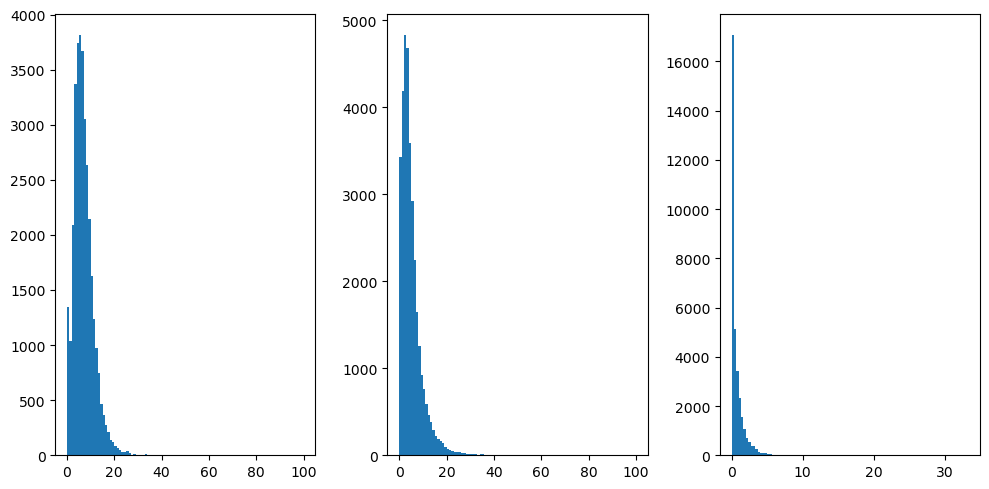

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(x = df[df.columns[0]], bins = 100)
ax2.hist(x = df[df.columns[1]], bins = 100)
ax3.hist(x = df[df.columns[2]], bins = 100)

fig.tight_layout()

plt.show()

#### 상자그림(박스플롯)

<Axes: >

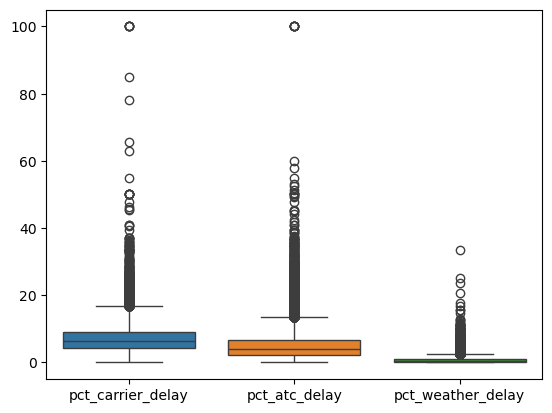

In [76]:
sns.boxplot(data = df)

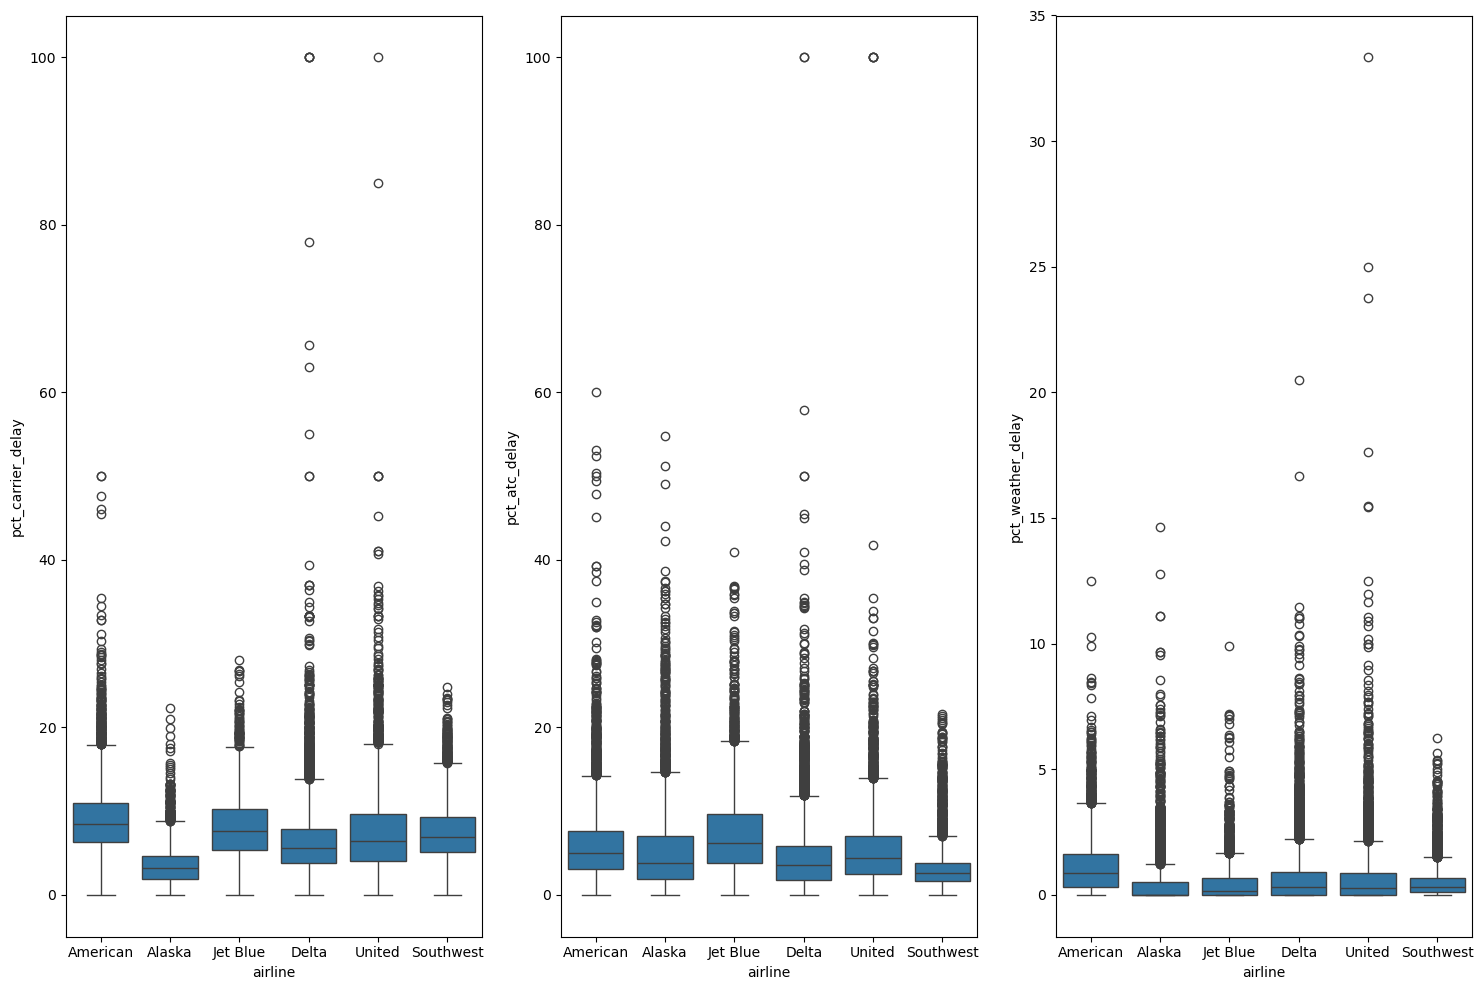

In [117]:
# 항공사별 지연 요인 분석
fig = plt.figure(figsize = (15,10))
ax0 = fig.add_subplot(1,3,1)
sns.boxplot(data = df, x = 'airline', y = df[df.columns[0]])

ax1 = fig.add_subplot(1,3,2)
sns.boxplot(data = df, x = 'airline', y = df[df.columns[1]])

ax2 = fig.add_subplot(1,3,3)
sns.boxplot(data = df, x = 'airline', y = df[df.columns[2]])

fig.tight_layout()
plt.show()

#### 산점도 확인

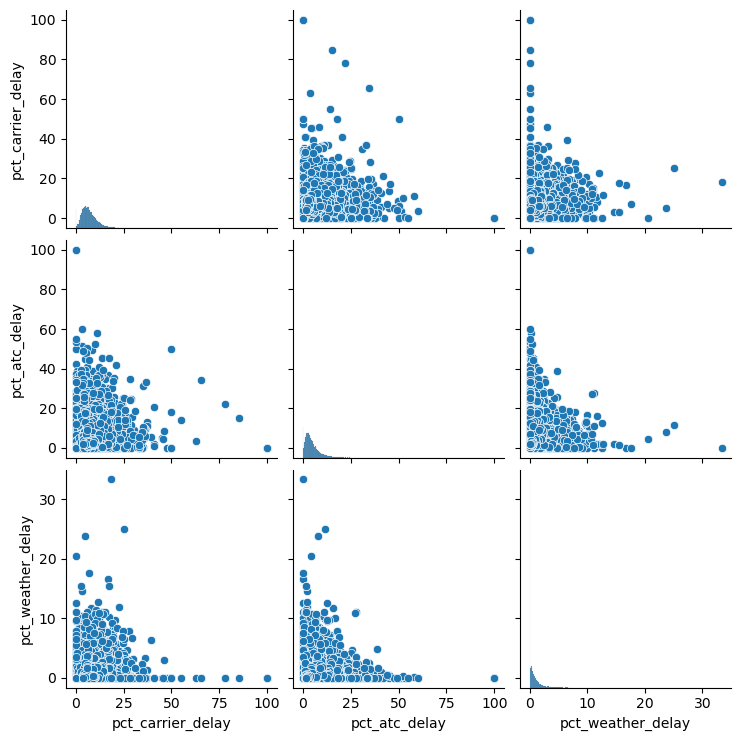

In [119]:
sns.pairplot(data = df)

#### 상관관계 분석

In [123]:
corr_matrix = df.corr(numeric_only = True)
corr_matrix

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,1.000000,0.144474,0.161474
pct_atc_delay,0.144474,1.000000,0.091729
pct_weather_delay,0.161474,0.091729,1.000000


<Axes: >

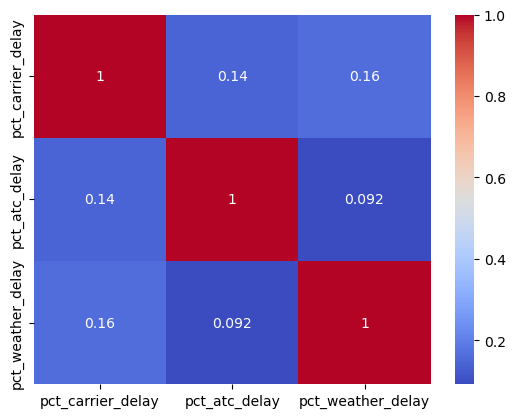

In [127]:
sns.heatmap(data = corr_matrix, annot = True, cmap='coolwarm')